# Ejercicio 2 - Parcial

Sea 𝑍 la variable aleatoria con distribución skew-normal de parámetro 𝑎 = 10. Consideremos
la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1. Sean 𝑋 ∼ U (0, 1) y 𝑌 := 𝑓 (𝑋) + 𝑍.

### Aclaración

Dado 𝑎 ∈ R, la variable aleatoria skew-normal de parámetro a es la que tiene pdf dada por 𝑓 (𝑥) = 2𝜙 (𝑥)Φ(𝑎𝑥), donde
𝜙 y Φ son la pdf y la cdf de la normal estándar. Para usarla en Python, se puede importar usando from scipy.stats
import skewnorm y luego se puede samplear con skewnorm.rvs(a=10, size=100), para una muestra de tamaño
100 con 𝑎 = 10.

## a)
Fijemos 𝑛 = 100. Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y 𝑧1, . . . , 𝑧𝑛 de 𝑍 y calcular 𝑦𝑖 = 𝑓 (𝑥𝑖) + 𝑧𝑖,
con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples
(𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados.

### Desarrollo

Primero obtengo las muestras y defino las funciones que voy a utilizar:

In [1]:
from scipy.stats import skewnorm, uniform
import numpy as np

# Planto la semilla para que los resultados sean reproducibles
np.random.seed(19)

# Defino la longitud y muestras que voy a tomar
longitud_muestra = 100
X = uniform.rvs(size=longitud_muestra)
Z = skewnorm.rvs(a=10, size=longitud_muestra)

# Defino la función f
def f(x):
    return 2*x -1

# Ahora defino a Y
Y = f(X) + Z

Y ahora realizo el ajuste lineal:

In [2]:
# Quiero hacer el ajuste lineal de la forma Y = XB1 + B0
# Para ello, defino la matriz X
X = np.column_stack((np.ones(longitud_muestra), X))

# Defino la función para hacer el ajuste por minimos cuadrados
minimos_cuadrados = lambda X, Y: np.linalg.inv(X.T @ X) @ X.T @ Y

# Realizo el ajuste e imprimo los pesos obtenidos
B = minimos_cuadrados(X, Y)
print('Coeficientes estimados:')
print(f'B0 = {B[0]:.2f}')
print(f'B1 = {B[1]:.2f}')

Coeficientes estimados:
B0 = -0.21
B1 = 1.99


## b)
Repetir el paso anterior 𝑚 = 30 veces para obtener 𝑚 pares de coeficientes 𝛽0 y 𝛽1, es decir, 𝑚
samples de 𝛽ˆ0 y 𝑚 samples de 𝛽ˆ1. ¿Diríamos que estas distribuciones empíricas son normales?
Hacer histogramas para comprobarlo.

### Desarrollo

Armo todo el sistema para repetir el paso anterior:

In [6]:
# Defino la cantidad de iteraciones
m = 30

# Armo una matriz donde voy guardando los coeficientes estimados B0 y B1
B = np.zeros((m, 2))

# Realizo las m iteraciones
for i in range(m):
    
    X = uniform.rvs(size=longitud_muestra)
    Z = skewnorm.rvs(a=10, size=longitud_muestra)
    Y = f(X) + Z
    betas = minimos_cuadrados(np.column_stack((np.ones(longitud_muestra), X)), Y)
    
    B[i, 0] = betas[0]
    B[i, 1] = betas[1]

Y ahora hago un gráfico de la distribución empírica de ambas variables para analizar si son normales:

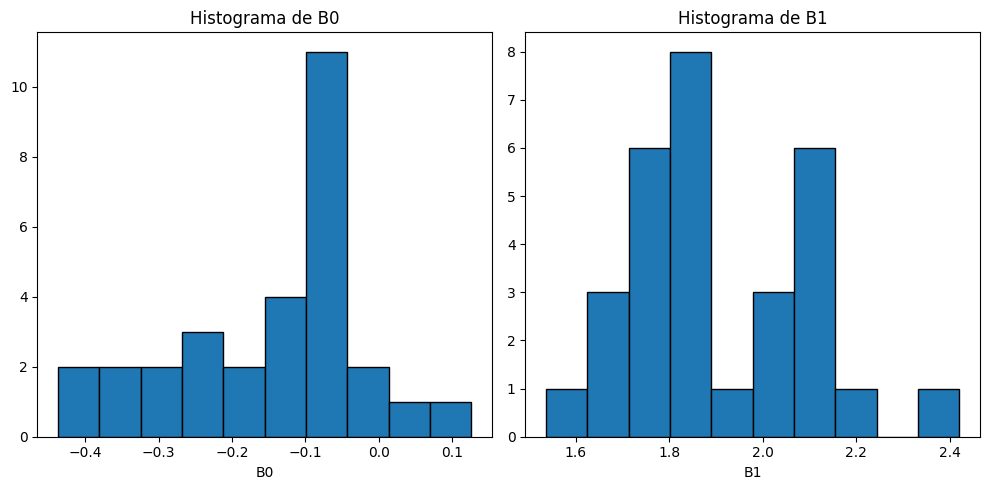

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Separo B0 y B1
B0 = B[:, 0]
B1 = B[:, 1]

# Grafico los histogramas
ax[0].hist(B0, bins=10, edgecolor='black')
ax[0].set_title('Histograma de B0')
ax[0].set_xlabel('B0')

ax[1].hist(B1, bins=10, edgecolor='black')
ax[1].set_title('Histograma de B1')
ax[1].set_xlabel('B1')

plt.tight_layout()
plt.show()

Por lo observado en el gráfico, claramente se puede notar que ninguna de las dos distribuciones empíricas se aproximan a una normal por más que se 
tomaron **30 muestras**.

* Se puede notar como en **el gráfico de B0** no existe simetría y hay valores que suelen aparecer más que otros, como lo son aquellos en el rango 
  entre (-0.1, 0)

* En el caso del **gráfico de B1** podemos ver que existe cierta bimodalidad que hace que la distribución no sea simétrica, cosa que provoca que tampoco
  se aproxime a una normal